In [20]:
import numpy as np
import matplotlib.pyplot as plt
import jeans
import scipy.special
import astropy.units as u

**The following models for the dark matter halo are available:**

**NFW ('nfw')**: mass-density profile is $\rho_{\rm NFW}(r)=\frac{\rho_s}{(r/r_s)[1+r/r_s]^2}$, $\rho_s$ and $r_s$ are scale density and scale radius

**Dehnen cusp ('dehnen_cusp')**: mass-density profile is $\rho_{\rm Dcusp}(r)=\frac{\rho_s}{(r/r_s)[1+r/r_s]^3}$, $\rho_s$ and $r_s$ are scale density and scale radius

**Dehnen core ('dehnen_core')**: mass-density profile is $\rho_{\rm Dcore}(r)=\frac{\rho_s}{[1+r/r_s]^3}$, $\rho_s$ and $r_s$ are scale density and scale radius

$\mathbf{\alpha\beta\gamma}$ **('abg')**: mass-density profile is $\rho_{\alpha\beta\gamma}(r)=\frac{\rho_s}{(r/r_s)^{\gamma}[1+(r/r_s)^{\alpha}]^{(\beta-\gamma)/\alpha}}$, $\rho_s$ and $r_s$ are scale density and scale radius, $\alpha$ controls rate of transition from power law $\rho\propto^{-\beta}$ at $r\gg r_s$ to $\rho\propto^{-\gamma}$ at $r\ll r_s$.

**coreNFW ('cnfw')** (Read et al. 2018, arXiv:1805.06934): enclosed-mass profile is $M(r)=f^nM_{\rm NFW}(r)$, where $M_{\rm NFW}(r)\equiv 4\pi \int_0^{r}x^2\rho_{\rm NFW}(x)\,dx$ and $f^n\equiv [\tanh(r/r_c)]^n$, with $r_c$ a core radius, $n$ controls the degree of core formation ($n=0$ means no core, $n=1$ means maximum core).  

**coreNFWtides ('cnfwt')** (Read et al. 2018, arXiv:1805.06934): mass-density profile is $\rho_{\rm cNFWt}(r)= \rho_{\rm cNFW}(r)$ for $r<r_t$, $\rho_{\rm cNFWt}(r)=\rho_{\rm cNFW}(r_t)(r/r_t)^{-\delta}$ for $r\geq r_t$, where $r_t$ is a tidal radius and $\delta$ the power-law slope at $r>r_t$.  


All of the models are specified by overdensity parameter, $\Delta$, mass $M_{\Delta}$, and concentration $c_{\Delta}\equiv r_{\Delta}/r_s$, defined so that the mean halo density within a sphere of radius $r_{\Delta}$ is $3M_{\Delta}/(4\pi r_{\Delta}^3)=\Delta\rho_{c}$, where $\rho_c=3H^2/(8\pi G)$ is the cosmological closure density and Hubble parameter specified by $h\equiv H/(100$ km s$^{-1}$ Mpc$^{-1}$). 


In [21]:
#create halo objects for various DM halo models.  
#If no units are specified for M_triangle, Msun will be assumed
#Any radii (e.g., core radius, tidal radius) must be specified in units of r_triangle
#The value of r_triangle is determined by the input parameters

halo_nfw=jeans.get_dmhalo('nfw',triangle=200,h=0.7,m_triangle=1.e+12*u.M_sun,c_triangle=10)

halo_cnfw=jeans.get_dmhalo('cnfw',triangle=200,h=0.7,m_triangle=1.e+12*u.M_sun,c_triangle=10,
                       r_core=0.1,n_core=1.)#r_core must be specified in units of r_triangle

halo_cnfwt=jeans.get_dmhalo('cnfwt',triangle=200,h=0.7,m_triangle=1.e+12*u.M_sun,c_triangle=10,
                       r_core=0.1,r_tide=0.5,n_core=1.,delta=5.)#r_core and r_tide must be specified in units of r_triangle

halo_abg=jeans.get_dmhalo('abg',triangle=200,h=0.7,m_triangle=1.e+12*u.M_sun,c_triangle=10,alpha=1.4,beta=5.,gamma=0.5)

Optimization terminated successfully.
         Current function value: -1.452283
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1.427627
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1.427627
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -4.204877
         Iterations: 31
         Function evaluations: 62


halo object stores input parameters corresponding to scale density $\rho_s$, scale radius $r_s$, overdensity radius $r_{\Delta}$, central potential $\Phi(0)$, as well as maximum circular velocity, $v_{max}$, and radius $r_{\rm max}$ where $v_c=v_{\rm max}$.  Also includes functions for mass density $\rho(x)/\rho_s$, enclosed mass $M(x)/M_{\Delta}$, potential $\Phi(x)/\Phi(0)$, and circular velocity $v_{\rm circ}(x)=GM(x)/x$, where $x\equiv r/r_s$.

In [22]:
vars(halo_cnfw)

{'model': 'cnfw',
 'triangle': 200,
 'h': 0.7,
 'm_triangle': <Quantity 1.e+12 solMass>,
 'c_triangle': 10,
 'r_triangle': <Quantity 206535.79128679 pc>,
 'r_core': 0.1,
 'n_core': 1.0,
 'r_tide': None,
 'delta': None,
 'alpha': None,
 'beta': None,
 'gamma': None,
 'rho_scale': <Quantity 0.0060669 solMass / pc3>,
 'r_scale': <Quantity 20653.57912868 pc>,
 'v_max': <Quantity 172.74310775 km / s>,
 'r_max': <Quantity 52896.21524686 pc>,
 'mass_density': <function jeans.main.get_dmhalo.<locals>.mass_density(x)>,
 'enclosed_mass': <function jeans.main.get_dmhalo.<locals>.enclosed_mass(x)>,
 'vcirc': <function jeans.main.get_dmhalo.<locals>.vcirc(x)>,
 'potential': <function jeans.main.get_dmhalo.<locals>.potential(x)>,
 'phi0': <Quantity -252763.2338712 km2 / s2>}

**The following models are available for the tracer component:**
    
**Plummer ('plum')**: luminosity-density profile is $\nu(r)=\frac{\nu_0}{[1+(r^2/r_s)^2]^{5/2}}$, with $\nu_0$ and $r_s$ the scale density and scale radius

**Exponential ('exp')**: Projected luminosity-density profile is $\Sigma(R)=\Sigma_0\exp(-R/r_s)$

$\alpha\beta\gamma$ **('abg')**: luminosity-density profile is $\nu(r)=\frac{\nu_s}{(r/r_s)^{\gamma}[1+(r/r_s)^{\alpha}]^{(\beta-\gamma)/\alpha}}$, $\nu_s$ and $r_s$ are scale density and scale radius, $\alpha$ controls rate of transition from power law $\nu\propto^{-\beta}$ at $r\gg r_s$ to $\nu\propto^{-\gamma}$ at $r\ll r_s$.

$\alpha2\beta\gamma$ **('a2bg')**: luminosity-density profile is $\nu(r)=\frac{\nu_s}{(r/r_s)^{\gamma}[1+(r/r_s)^{2}]^{(\beta-\gamma)/2}}$, $\nu_s$ and $r_s$ are scale density and scale radius, transition from power law $\nu\propto^{-\beta}$ at $r\gg r_s$ to $\nu\propto^{-\gamma}$ at $r\ll r_s$.

In [23]:
#create tracer objects for various stellar density profiles
#If no units are specified for r_scale, pc will be assumed
#If no units are specified for luminosity, L_sun will be assumed
#upsilon is tracer M/L ratio, for massless tracers set upsilon=0

tracer_plum=jeans.get_tracer('plum',r_scale=1000.*u.pc,luminosity_tot=1.e+10*u.L_sun,upsilon=1.*u.M_sun/u.L_sun)
tracer_exp=jeans.get_tracer('exp',r_scale=1000.*u.pc,luminosity_tot=1.e+10*u.L_sun,upsilon=1.*u.M_sun/u.L_sun)
tracer_a2bg=jeans.get_tracer('a2bg',r_scale=1000.*u.pc,luminosity_tot=1.e+10*u.L_sun,upsilon=1.*u.M_sun/u.L_sun,beta=6.,gamma=0.5)
tracer_abg=jeans.get_tracer('abg',r_scale=1000.*u.pc,luminosity_tot=1.e+10*u.L_sun,upsilon=1.*u.M_sun/u.L_sun,alpha=1.4,beta=6.,gamma=0.5)

tracer object stores input parameters and corresponding to $\nu_s$, $\Sigma_0$ (scale density for the projection of $\nu(r)$), 2D and 3D halflight radii, $L(r_s)/(\nu_s r_s^3)$ ('lscalenorm') and $L(\infty)/(\nu_s r_s^3)$ ('ltotnorm').  Also includes functions for $\nu(x)/\nu_s$ ('luminosity_density'), $L(x)/L(\infty)$ ('enclosed_luminosity'), where $x\equiv r/r_s$, and $\Sigma(X)/\Sigma_0$ ('luminosity_density_2d'), where $X\equiv R/r_s$.

In [24]:
vars(tracer_a2bg)

{'model': 'a2bg',
 'luminosity_tot': <Quantity 1.e+10 solLum>,
 'upsilon': <Quantity 1. solMass / solLum>,
 'r_scale': <Quantity 1000. pc>,
 'nu_scale': <Quantity 3.1866709 solLum / pc3>,
 'sigma0': <Quantity 3754.20821099 solLum / pc2>,
 'lscalenorm': 1.7878469398787962,
 'ltotnorm': 3.1380711428014263,
 'alpha': None,
 'beta': 6.0,
 'gamma': 0.5,
 'rhalf_2d': <Quantity 679.13632904 pc>,
 'rhalf_3d': <Quantity 890.33057349 pc>,
 'luminosity_density': <function jeans.main.get_tracer.<locals>.luminosity_density(x)>,
 'luminosity_density_2d': <function jeans.main.get_tracer.<locals>.luminosity_density_2d(x)>,
 'enclosed_luminosity': <function jeans.main.get_tracer.<locals>.enclosed_luminosity(x)>}

**The following models are available for the velocity dispersion anisotropy of the tracer component:**
    
**Read ('read')** (arXiv:1805.06934): $\beta(r)=\beta_0+(\beta_{\infty}-\beta_0)/(1+(r/r_{\beta})^{-n})$, where $\beta_0=\beta(0)$, $\beta_{\infty}=\beta(\infty)$, $n$ controls rate of transition around $r_{\beta}$.


In [25]:
#create anisotropy object 
anisotropy_read=jeans.get_anisotropy('read',beta_0=-0.4,beta_inf=+0.6,r_beta=0.7,n_beta=1.)#r_beta must be specified in units of tracer scale radius

anisotropy object stores input parameters and functions for $\beta(x)$ ('beta'), and $f_{\beta}(x)=\exp[2\int\frac{\beta(x)\,dx}{x}]$ ('f_beta'), where $x\equiv r/r_{\beta}$

In [26]:
vars(anisotropy_read)

{'model': 'read',
 'beta_0': -0.4,
 'beta_inf': 0.6,
 'r_beta': 0.7,
 'n_beta': 1.0,
 'f_beta': <function jeans.main.get_anisotropy.<locals>.f_beta(x)>,
 'beta': <function jeans.main.get_anisotropy.<locals>.beta(x)>}

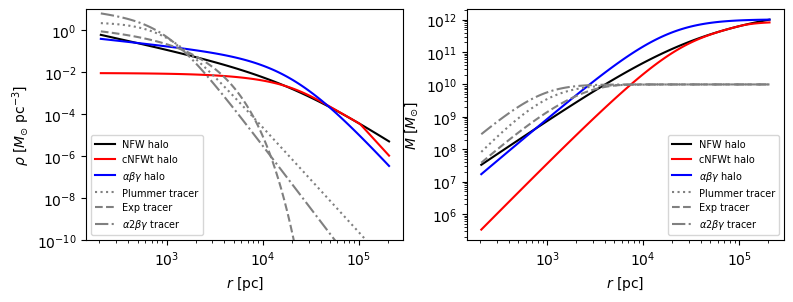

In [27]:
#plot mass-density and enclosed-mass profiles for halo and tracers
x=np.logspace(-3,0,100)

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=False)

axs[0].plot(x*halo_nfw.r_triangle,halo_nfw.mass_density(x)*halo_nfw.rho_scale,color='k',label='NFW halo')
axs[0].plot(x*halo_cnfwt.r_triangle,halo_cnfwt.mass_density(x)*halo_cnfwt.rho_scale,color='r',label='cNFWt halo')
axs[0].plot(x*halo_abg.r_triangle,halo_abg.mass_density(x)*halo_abg.rho_scale,color='b',label=r'$\alpha\beta\gamma$ halo')
axs[0].plot(x*halo_nfw.r_triangle,tracer_plum.luminosity_density(x*halo_nfw.r_triangle/tracer_plum.r_scale)*tracer_plum.nu_scale*tracer_plum.upsilon,label='Plummer tracer',color='0.5',ls=':')
axs[0].plot(x*halo_nfw.r_triangle,tracer_exp.luminosity_density(x*halo_nfw.r_triangle/tracer_exp.r_scale)*tracer_exp.nu_scale*tracer_exp.upsilon,label='Exp tracer',color='0.5',ls='--')
axs[0].plot(x*halo_nfw.r_triangle,tracer_a2bg.luminosity_density(x*halo_nfw.r_triangle/tracer_a2bg.r_scale)*tracer_a2bg.nu_scale*tracer_a2bg.upsilon,label=r'$\alpha 2\beta\gamma$ tracer',color='0.5',ls='-.')
axs[0].legend(loc=3,fontsize=7)
axs[0].set_xlabel('$r$ [pc]')
axs[0].set_ylabel(r'$\rho$ [$M_{\odot}$ pc$^{-3}$]')
axs[0].set_ylim([1.e-10,10])
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].plot(x*halo_nfw.r_triangle,halo_nfw.enclosed_mass(x)*halo_nfw.m_triangle,color='k',label='NFW halo')
axs[1].plot(x*halo_cnfwt.r_triangle,halo_cnfwt.enclosed_mass(x)*halo_cnfwt.m_triangle,color='r',label='cNFWt halo')
axs[1].plot(x*halo_abg.r_triangle,halo_abg.enclosed_mass(x)*halo_abg.m_triangle,color='b',label=r'$\alpha\beta\gamma$ halo')
axs[1].plot(x*halo_nfw.r_triangle,tracer_plum.enclosed_luminosity(x*halo_nfw.r_triangle/tracer_plum.r_scale)*tracer_plum.luminosity_tot*tracer_plum.upsilon,label='Plummer tracer',color='0.5',ls=':')
axs[1].plot(x*halo_nfw.r_triangle,tracer_exp.enclosed_luminosity(x*halo_nfw.r_triangle/tracer_exp.r_scale)*tracer_exp.luminosity_tot*tracer_exp.upsilon,label='Exp tracer',color='0.5',ls='--')
axs[1].plot(x*halo_nfw.r_triangle,tracer_a2bg.enclosed_luminosity(x*halo_nfw.r_triangle/tracer_a2bg.r_scale)*tracer_a2bg.luminosity_tot*tracer_a2bg.upsilon,label=r'$\alpha 2\beta\gamma$ tracer',color='0.5',ls='-.')
axs[1].legend(loc=4,fontsize=7)
axs[1].set_xlabel('$r$ [pc]')
axs[1].set_ylabel(r'$M$ [$M_{\odot}$]')
#axs[1].set_ylim([1.e-10,10])
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.show()

**Compute velocity dispersions at a specified radius**.  Reasonable values for "upper_limit" of integration are np.inf and 1 (i.e., integrating to $r_{\Delta}$, since the integration variable is $x=r/r_{\Delta}$)

In [28]:
x_halo=0.1 #r/r_triangle
jeans_integral=jeans.integrate(x_halo,halo_nfw,tracer_plum,anisotropy_read,
                               component=['los','rad','tan','3d'],upper_limit=np.inf,
                              epsrel=1.e-8,epsabs=1.e-12)

jeans_integral object stores velocity dispersion components in spherical and cylindrical coordinates, with cylindrical coordinates representing the observable (projected) components (line-of-sight, projected radial and projected tangential).  In spherical coordinates, $\sigma_{\rm tan}=\sigma_{\theta}=\sigma_{\phi}$.

In [29]:
vars(jeans_integral)

{'sigma_proj_los': <Quantity 65.77678291 km / s>,
 'sigma_proj_rad': <Quantity 83.7626303 km / s>,
 'sigma_proj_tan': <Quantity 58.35552237 km / s>,
 'sigma_rad': <Quantity 88.62939416 km / s>,
 'sigma_tan': <Quantity 58.30584171 km / s>}

Compute surface-brightness-weighted mean LOS velocity dispersion, $\langle \sigma^2_{\rm LOS}\rangle$ and the virial coefficient, $\mu=\frac{GM(\lambda r_{\rm half})}{\lambda r_{\rm half}\langle \sigma_{\rm LOS}^2\rangle}$ (Errani et al. 2018) 

In [30]:
sigma,mu=jeans.get_virial(halo_nfw,tracer_plum,lamb=1.)

In [31]:
print(sigma,mu)

77.38913679703812 km / s 3.0812142547684442
